# Example 2: BUILD A MULTIPLE LAYER PERCEPTRON FOR CANCER CLASSIFICATION 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# example making new class predictions for a classification problem
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler


In [3]:
# Import Cancer data drom the Sklearn library
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
df_cancer = pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns = np.append(cancer['feature_names'], ['target']))


In [4]:
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [5]:
X = df_cancer.iloc[:,[0,1]]
X

,mean radius,mean texture
0,17.99,10.38
1,20.57,17.77
2,19.69,21.25
3,11.42,20.38
4,20.29,14.34
...,...,...
564,21.56,22.39
565,20.13,28.25
566,16.60,28.08
567,20.60,29.33


In [6]:
y = df_cancer['target']
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
564    0.0
565    0.0
566    0.0
567    0.0
568    1.0
Name: target, Length: 569, dtype: float64

<Axes: xlabel='mean radius', ylabel='mean texture'>

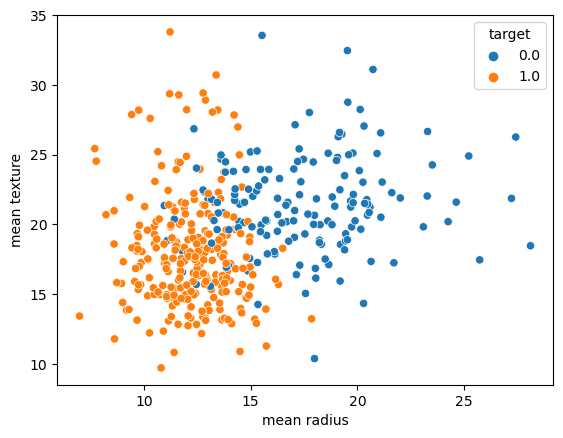

In [7]:

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

sns.scatterplot(x = X_train['mean radius'], y = X_train['mean texture'], hue = y_train)

In [8]:
scalar = MinMaxScaler()
scalar.fit(X_train)
X_train_scaled = scalar.transform(X_train)


scalar = MinMaxScaler()
scalar.fit(X_test)
X_test_scaled = scalar.transform(X_test)


<Axes: >

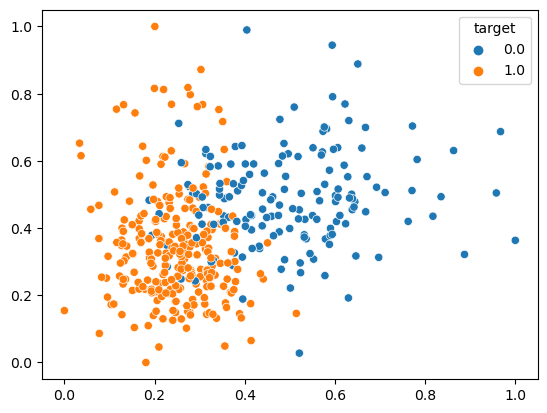

In [10]:

sns.scatterplot(x=X_train_scaled[:,0], y=X_train_scaled[:,1], hue=y_train)

In [11]:
# define and fit the final model
model = Sequential()
model.add(Dense(1, input_dim=2, activation='sigmoid'))
#model.add(Dense(4, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')
model.fit(X_train_scaled, y_train, epochs=500, verbose=2)



Epoch 1/500


H:\anaconda3-fresh\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 - 0s - 29ms/step - loss: 0.6785
Epoch 2/500
14/14 - 0s - 2ms/step - loss: 0.6770
Epoch 3/500
14/14 - 0s - 2ms/step - loss: 0.6755
Epoch 4/500
14/14 - 0s - 2ms/step - loss: 0.6739
Epoch 5/500
14/14 - 0s - 2ms/step - loss: 0.6726
Epoch 6/500
14/14 - 0s - 2ms/step - loss: 0.6712
Epoch 7/500
14/14 - 0s - 2ms/step - loss: 0.6699
Epoch 8/500
14/14 - 0s - 2ms/step - loss: 0.6687
Epoch 9/500
14/14 - 0s - 2ms/step - loss: 0.6675
Epoch 10/500
14/14 - 0s - 2ms/step - loss: 0.6663
Epoch 11/500
14/14 - 0s - 2ms/step - loss: 0.6651
Epoch 12/500
14/14 - 0s - 2ms/step - loss: 0.6640
Epoch 13/500
14/14 - 0s - 2ms/step - loss: 0.6629
Epoch 14/500
14/14 - 0s - 2ms/step - loss: 0.6617
Epoch 15/500
14/14 - 0s - 2ms/step - loss: 0.6606
Epoch 16/500
14/14 - 0s - 2ms/step - loss: 0.6595
Epoch 17/500
14/14 - 0s - 2ms/step - loss: 0.6584
Epoch 18/500
14/14 - 0s - 2ms/step - loss: 0.6574
Epoch 19/500
14/14 - 0s - 2ms/step - loss: 0.6564
Epoch 20/500
14/14 - 0s - 2ms/step - loss: 0.6554
Epoch 21/500
14/14 -

# LET'S TRY MORE NEURONS

In [12]:
# define and fit the final model
model = Sequential()
model.add(Dense(20, input_dim=2, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')
model.fit(X_train_scaled, y_train, epochs=500, verbose=2)


Epoch 1/500


H:\anaconda3-fresh\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 - 1s - 53ms/step - loss: 0.6794
Epoch 2/500
14/14 - 0s - 2ms/step - loss: 0.6678
Epoch 3/500
14/14 - 0s - 2ms/step - loss: 0.6540
Epoch 4/500
14/14 - 0s - 2ms/step - loss: 0.6401
Epoch 5/500
14/14 - 0s - 2ms/step - loss: 0.6236
Epoch 6/500
14/14 - 0s - 2ms/step - loss: 0.6062
Epoch 7/500
14/14 - 0s - 2ms/step - loss: 0.5869
Epoch 8/500
14/14 - 0s - 2ms/step - loss: 0.5660
Epoch 9/500
14/14 - 0s - 2ms/step - loss: 0.5433
Epoch 10/500
14/14 - 0s - 2ms/step - loss: 0.5208
Epoch 11/500
14/14 - 0s - 2ms/step - loss: 0.4992
Epoch 12/500
14/14 - 0s - 2ms/step - loss: 0.4779
Epoch 13/500
14/14 - 0s - 2ms/step - loss: 0.4543
Epoch 14/500
14/14 - 0s - 2ms/step - loss: 0.4310
Epoch 15/500
14/14 - 0s - 2ms/step - loss: 0.4114
Epoch 16/500
14/14 - 0s - 2ms/step - loss: 0.3936
Epoch 17/500
14/14 - 0s - 2ms/step - loss: 0.3791
Epoch 18/500
14/14 - 0s - 2ms/step - loss: 0.3642
Epoch 19/500
14/14 - 0s - 2ms/step - loss: 0.3523
Epoch 20/500
14/14 - 0s - 2ms/step - loss: 0.3406
Epoch 21/500
14/14 -

In [13]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 20)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,505 (5.88 KB)

 Trainable params: 501 (1.96 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,004 (3.93 KB)

In [14]:

# make a prediction
# y_predict = model.predict_classes(X_test_scaled)  Deprecated syntax...
y_predict = (model.predict(X_test_scaled) > 0.5).astype("int32")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


<Axes: >

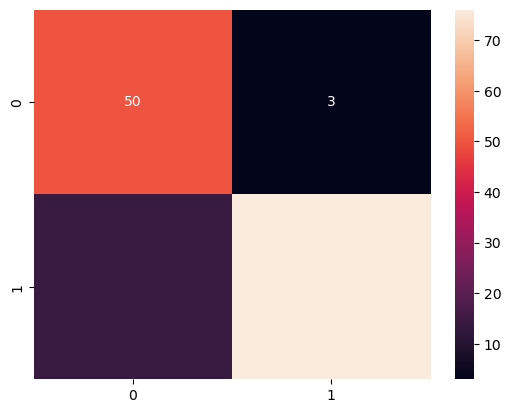

In [15]:

from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test, y_predict)

sns.heatmap(cm,annot=True,fmt="d")

In [16]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.78      0.94      0.85        53
         1.0       0.96      0.84      0.90        90

    accuracy                           0.88       143
   macro avg       0.87      0.89      0.88       143
weighted avg       0.90      0.88      0.88       143



2813/2813 ━━━━━━━━━━━━━━━━━━━━ 2s 592us/step


C:\Users\Frank\AppData\Local\Temp\ipykernel_23344\2355298797.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_grid[y_grid == j, 0], X_grid[y_grid == j, 1],


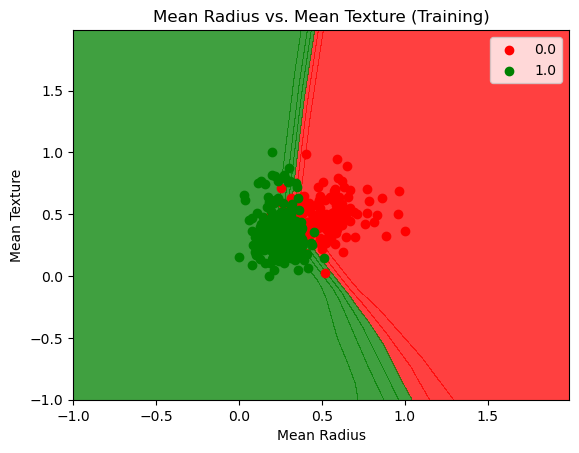

In [17]:

# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_grid, y_grid = X_train_scaled, y_train
X1, X2 = np.meshgrid(np.arange(start = X_grid[:, 0].min() - 1, stop = X_grid[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_grid[:, 1].min() - 1, stop = X_grid[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(['red', 'green']))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_grid)):
    plt.scatter(X_grid[y_grid == j, 0], X_grid[y_grid == j, 1],
                c = ListedColormap(['red', 'green'])(i), label = j)
    
plt.title('Mean Radius vs. Mean Texture (Training)')
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.legend()
plt.show()

In [18]:
weights, biases = model.layers[0].get_weights()

In [19]:
weights

array([[-0.47954673,  0.4838121 ,  0.31256494, -0.45821878, -0.18738872,
        -0.2465148 ,  0.77791095, -0.23772874, -0.44844985, -0.0780628 ,
         0.5146587 , -0.5895993 , -0.3928368 ,  0.06301286, -0.03484589,
         0.6432442 , -0.11243892, -0.04107425, -0.42438263,  0.42864573],
       [ 0.14352347,  0.80541754,  0.3357144 ,  0.16890082, -0.25048444,
         0.00970662,  0.52980095, -0.25291649, -0.03839343, -0.43106857,
         0.35770208,  0.7599644 , -0.1032557 ,  0.08266075, -0.0888541 ,
         0.06362478,  0.18995348,  0.11137404,  0.0459164 ,  0.396402  ]],
      dtype=float32)

In [20]:
biases

array([ 0.24768513, -0.19559102, -0.12317964,  0.3488347 ,  0.        ,
       -0.00519978, -0.08389402,  0.        ,  0.3221596 ,  0.        ,
       -0.00609181, -0.18316741,  0.30192065,  0.32431805,  0.        ,
       -0.09639295,  0.27757904,  0.28080496,  0.2832395 , -0.1536791 ],
      dtype=float32)

2813/2813 ━━━━━━━━━━━━━━━━━━━━ 2s 540us/step


C:\Users\Frank\AppData\Local\Temp\ipykernel_23344\4271243126.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_grid[y_grid == j, 0], X_grid[y_grid == j, 1],


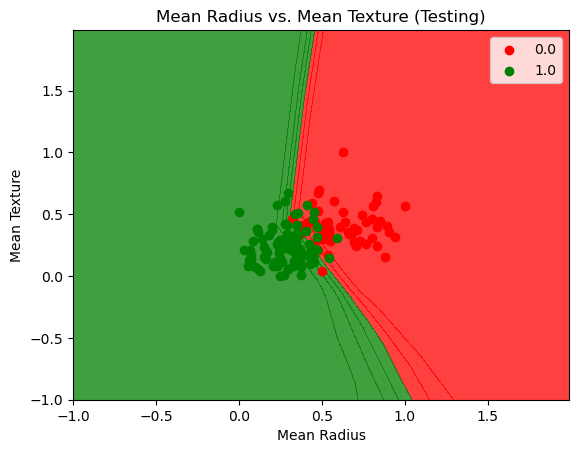

In [21]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_grid, y_grid = X_test_scaled, y_test
X1, X2 = np.meshgrid(np.arange(start = X_grid[:, 0].min() - 1, stop = X_grid[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_grid[:, 1].min() - 1, stop = X_grid[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(['red', 'green']))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_grid)):
    plt.scatter(X_grid[y_grid == j, 0], X_grid[y_grid == j, 1],
                c = ListedColormap(['red', 'green'])(i), label = j)
    
plt.title('Mean Radius vs. Mean Texture (Testing)')
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.legend()
plt.show()

# Great Job!